Name: Doga Yalcin
<br>
ID: 191101054
<br>
Course: BIL470
<br>
Homework 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from LR import LineerRegression

# Exploratory Data Analysis (EDA)

In [2]:
data = pd.read_csv(r'./500_Person_Gender_Height_Weight_Index.csv')
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [3]:
#Remove Gender
data = data.drop(columns='Gender')
data

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  500 non-null    int64
 1   Weight  500 non-null    int64
 2   Index   500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


In [5]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


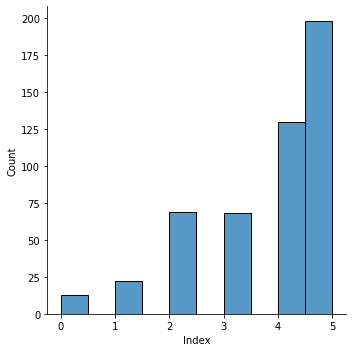

In [6]:
sns.displot(data["Index"])

Indexlerin cogunlugu [4,5] araligindadir.

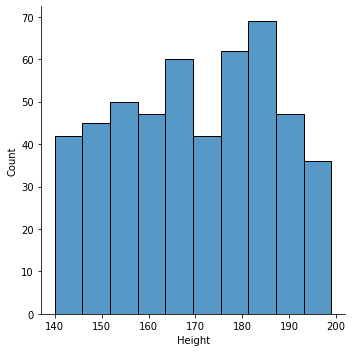

In [7]:
sns.displot(data["Height"])

Dengeli bir dagilim vardir.

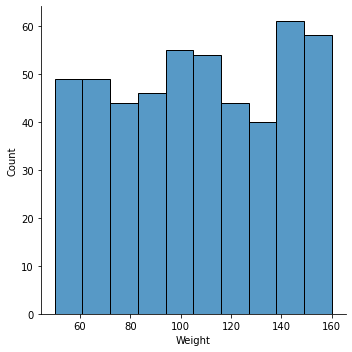

In [8]:
sns.displot(data["Weight"])

Dengeli bir dagilim vardir.

#### Boy-Kilo 2 boyutlu uzay

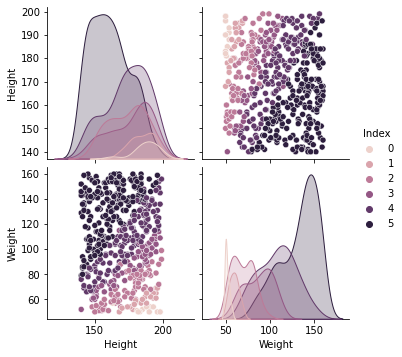

In [9]:
sns.pairplot(data, hue="Index")
plt.show()

### Correlation Matrix

In [10]:
data.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


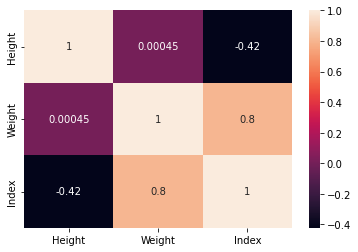

In [11]:
heatmap = sns.heatmap(data.corr(),annot=True)

## Train the lineer Regression Model

In [12]:
lr = LineerRegression(learning_rate=0.000005, epoch=1000)
d = data.values.tolist()
X = [];
Y = [];
z = [];
for row in d:
    z.append(int(row[2]))
    del row[2]
    Y.append(int(row[1]))
    del row[1]
    X.append(int(row[0]))
    del row[0]
X = pd.Series(X)
Y = pd.Series(Y)
z = pd.Series(z)
X_train, X_test, Y_train, Y_test, z_train, z_test = train_test_split(X, Y, z,  test_size=0.5, shuffle=True)

X_train_list = X_train.values.tolist()
Y_train_list = Y_train.values.tolist()
z_train_list = z_train.values.tolist()
X_test_list = X_test.values.tolist()
Y_test_list = Y_test.values.tolist()
z_test_list = z_test.values.tolist()

#### Train the model

In [13]:
lr.fit(X_train_list,Y_train_list,z_train_list);

#### Test the model

In [14]:
test_prediction = lr.predict(X_test_list, Y_test_list)
print("Test Features Expected")
print(z_test_list)
print("Prediction")
print(test_prediction)
train_prediction = lr.predict(X_train_list, Y_train_list)
print("Train Features Expected")
print(z_train_list)
print("Prediction")
print(train_prediction)

Test Features Expected
[4, 5, 5, 3, 5, 2, 4, 4, 5, 2, 5, 5, 5, 3, 5, 4, 5, 2, 5, 3, 5, 4, 3, 4, 1, 4, 2, 1, 5, 3, 5, 5, 5, 4, 5, 3, 5, 4, 5, 5, 2, 5, 3, 1, 1, 2, 5, 0, 4, 5, 5, 2, 5, 2, 2, 4, 2, 4, 0, 5, 4, 4, 4, 3, 5, 5, 4, 2, 2, 2, 4, 4, 2, 5, 4, 5, 5, 3, 3, 3, 5, 5, 2, 5, 5, 5, 4, 5, 4, 3, 4, 3, 4, 3, 4, 5, 4, 1, 5, 5, 4, 3, 3, 4, 4, 5, 4, 4, 2, 5, 4, 5, 3, 4, 5, 4, 2, 2, 5, 2, 5, 3, 3, 2, 5, 5, 5, 4, 3, 4, 4, 4, 2, 2, 2, 0, 4, 4, 5, 2, 2, 5, 3, 1, 1, 5, 0, 5, 5, 5, 4, 2, 5, 3, 5, 4, 1, 5, 4, 2, 4, 4, 5, 3, 2, 4, 5, 3, 5, 5, 5, 0, 5, 1, 4, 5, 5, 5, 4, 4, 4, 3, 5, 2, 5, 5, 4, 5, 2, 5, 4, 3, 3, 1, 5, 2, 5, 5, 4, 3, 4, 2, 3, 5, 4, 2, 5, 5, 2, 5, 4, 5, 1, 4, 4, 5, 4, 5, 3, 4, 5, 0, 5, 5, 3, 4, 0, 5, 4, 4, 5, 2, 3, 5, 0, 2, 5, 2, 5, 4, 4, 3, 3, 4, 4, 2, 1, 2, 5, 0]
Prediction
[3.6297758893983034, 5.666417902096047, 4.0782716961497645, 2.398867187780108, 5.496005716745464, 2.765857060018051, 3.344538468542706, 3.3860643363476637, 3.0121671815238296, 2.725712648730272, 5.162335145499018, 5

### Train

#### Loss 

In [15]:
lr.fit(X_train_list,Y_train_list,z_train_list);

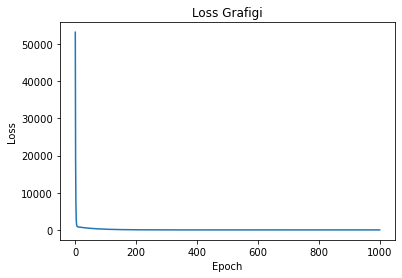

Initial:  53209.500957165525
Final:  0.5876166222110336


In [16]:
plt.title("Loss Grafigi")
l = lr.getLoss()
plt.plot(l)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()
print("Initial: ",l[0])
print("Final: ",l[len(l)-1])

Baslangicta cok yuksek bir loss degeri elde edilmistir, cunku agirlik 
atamalarini model yapmamistir. Model ogrenme gerceklestirdikce loss 
sonucunu mimize edecek sekilde agirliklari dengelemesi beklenmektedir.
Loss sonuclarina baktigimizda modelin bu dogrultuda agirliklari 
dengeledigi gozlemlenmektedir.

In [17]:
print(l)

[53209.500957165525, 19153.576106551456, 7267.337709936699, 3112.758640588201, 1654.6851882397964, 1137.1437205221073, 947.7495629850413, 872.9359627415253, 838.220896931461, 817.6271122087028, 802.0930571531433, 788.4564364887807, 775.6123094953869, 763.1732557302378, 751.0021175568505, 739.0490471561694, 727.2946774021977, 715.7303026302385, 704.3509663296783, 693.153050035748, 682.1334319878092, 671.2891932394164, 660.6175146956023, 650.1156407420552, 639.7808661050946, 629.6105308204505, 619.6020180370766, 609.7527528166775, 600.0602012874051, 590.5218699278702, 581.1353049032949, 571.8980914264406, 562.8078531336619, 553.8622514726155, 545.0589851003114, 536.3957892909588, 527.8704353533001, 519.4807300572452, 511.22451506963785, 503.0996663990008, 495.1040938491164, 487.2357404813075, 479.4925820852657, 471.872626658304, 464.3739138928973, 456.99451467237157, 449.7325305746205, 442.58609338372185, 435.55336460931215, 428.63253501362675, 421.821824146049, 415.1194798850756, 408.52

#### Accuracy(Rsquare)

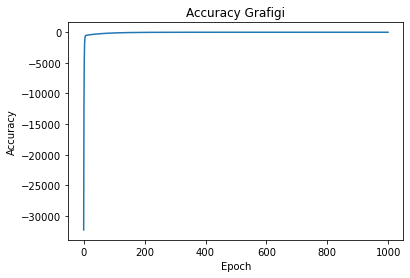

Initial:  -32293.843554059724
Final:  0.6433534135314083


In [18]:
plt.title("Accuracy Grafigi")
a = lr.getAccuracy()
plt.plot(a)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()
print("Initial: ",a[0])
print("Final: ",a[len(a)-1])

Baslangicta cok dusuk bir accuracy degeri elde edilmistir, cunku agirlik atamalarini model yapmamistir. Model ogrenme gerceklestirdikce accuracy sonucunun 1 degerine yaklasmasi beklenmektedir.
Accuracy(Rsquare) sonuclarina baktigimizda modelin bu dogrultuda agirliklari dengeledigi gozlemlenmektedir.

In [19]:
print(a)

[-32293.843554059724, -11624.024342171664, -4409.8200636172005, -1888.2500683340106, -1003.2905557118896, -689.1752110456018, -574.2247871986214, -528.8176047947626, -507.74772819119454, -495.24858717608043, -485.82038603239187, -477.54380904821437, -469.7482262222441, -462.19849754447625, -454.8113768965903, -447.5566097659718, -440.4224415168338, -433.40358835447114, -426.4970419865309, -419.7006062309117, -413.0123863738948, -406.4306107973084, -399.9535684865915, -393.57958695597574, -387.3070242733114, -381.13426600643123, -375.0597238902015, -369.0818350979106, -363.19906172761534, -357.40989036758066, -351.7128316933657, -346.1064200799471, -340.58921322302245, -335.1597917673881, -329.81675894159366, -324.5587401985415, -319.3843828618449, -314.2923557778309, -309.28134897308547, -304.350073317449, -299.4972601923735, -294.72166116456066, -290.0220476647878, -285.3972106718466, -280.84596040151257, -276.3671260004593, -271.959555245046, -267.6221142448987, -263.3536871512011, -

### Test

In [20]:
lr.fit(X_test_list,Y_test_list,z_test_list);

#### Loss

Train Loss grafigine benzer bir sonuc beklenmektedir 

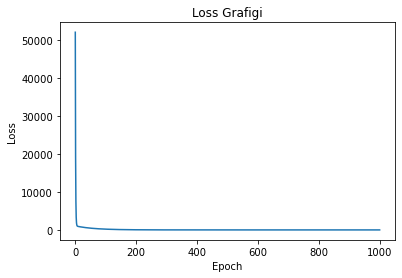

Initial:  51997.97744336
Final:  0.6707639150263797


In [21]:
plt.title("Loss Grafigi")
l = lr.getLoss()
plt.plot(l)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()
print("Initial: ",l[0])
print("Final: ",l[len(l)-1])

In [22]:
print(l)

[51997.97744336, 19214.44540908254, 7512.393048055173, 3328.3520997781516, 1825.4776428513042, 1278.9088431732946, 1073.5434600982783, 990.0281386987566, 950.1368072669663, 925.9705661550204, 907.5776373924597, 891.4063776262421, 876.1875289306092, 861.4657955775873, 847.0761917555931, 832.9573022156608, 819.0846887884028, 805.4471418964772, 792.0382109487956, 778.8531833185309, 765.8880063414306, 753.138902222157, 740.6022300483356, 728.2744359361894, 716.1520346153666, 704.2316022358747, 692.5097731873128, 680.9832383591992, 669.6487439252767, 658.5030903245993, 647.5431313225424, 636.765773109907, 626.1679734250356, 615.7467406934127, 605.4991331826142, 595.422258171704, 585.5132711345937, 575.7693749370547, 566.1878190471319, 556.7658987587072, 547.5009544280107, 538.3903707228473, 529.4315758843362, 520.6220410009441, 511.9592792946227, 503.4408454188299, 495.06433476825543, 486.82738280003787, 478.72766436629973, 470.76289305779716, 462.9308205585054, 455.22923601095977, 447.6559

#### Accuracy(Rsquare)

Train Accuracy grafigine benzer bir sonuc beklenmektedir 

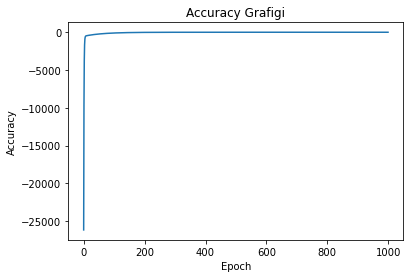

Initial:  -26173.04070592123
Final:  0.662359905535028


In [23]:
plt.title("Accuracy Grafigi")
a = lr.getAccuracy()
plt.plot(a)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()
print("Initial: ",a[0])
print("Final: ",a[len(a)-1])

In [24]:
print(a)

[-26173.04070592123, -9670.90842810847, -3780.487109818054, -1674.3809980037265, -917.8843197561825, -642.7598877156905, -539.3858304834127, -497.34701418021615, -477.2670536885527, -465.1025771132441, -455.84419265671846, -447.70412198093004, -440.04346314683113, -432.63303553042164, -425.38979079865845, -418.2828145716863, -411.29980549334135, -404.43512103773946, -397.68551419332323, -391.0486127815489, -384.52237682693425, -378.10490471380484, -371.7943637287864, -365.5889649657863, -359.48695405641297, -353.48660754922696, -347.586231308649, -341.7841596392674, -336.0787546738977, -330.46840586069635, -324.9515294905041, -319.52656824336543, -314.19199074663163, -308.94629114186347, -303.7879886594619, -298.71562720056977, -293.72777492600227, -288.8230238520502, -283.99998945302815, -279.25731027044264, -274.5936475286775, -270.0076847570793, -265.4981274183423, -261.06370254308047, -256.7031583704935, -252.41526399501387, -248.19880901884602, -244.05260321028962, -239.9754761677